PROBLEM STATEMENT

            # Reinforcement Learning to Rank in Search Engine/Value information/Product quality

Let say we have a search engine that provides results according to searches via traditional techniques from given set of unstructured data.Now as we know every user is not same.Your nlp search engine might help 60% of the user but it still lacks 40% user. 
Traditional search engines
1. Rule-based search
2. Statistical search
3. Lexicon-based search
4. Semantic search





Library

In [1]:
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
from transformers import AutoTokenizer, AutoModel
import tensorflow as tf
import numpy as np
import random
import json

PROCEDURE TO ACHIEVE RESULTS

1. Search or Create several different searching techniques which return results according to need

2. Now Create a table that has key which indicates different functions with values 1 as start

3. Now create a input sections which gives user privilege to contibute its input

4. Now use a Probability function that use the score table and rank the prefrences according to user

FILE INPUT

File where we need spacific informations


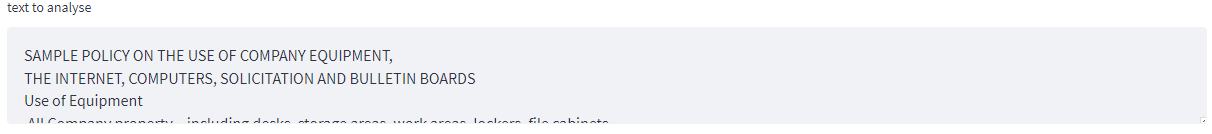

In [2]:
with open("POLICY.txt",encoding="utf-8") as value:
    text=value.readlines()
text="".join(text)

# text="""SAMPLE POLICY ON THE USE OF COMPANY EQUIPMENT,
# THE INTERNET, COMPUTERS, SOLICITATION AND BULLETIN BOARDS
# Use of Equipment
#  All Company property – including desks, storage areas, work areas, lockers, file cabinets,
# credenzas, computer systems, office telephones, cellular telephones, modems, facsimile
# machines, duplicating machines, copying machines and vehicles – must be used properly and
# maintained in good working order. Employees who lose, steal, or misuse Company property
# may be personally liable for replacing or repairing the item.
#  The Company reserves the right, at all times and without further notice, to inspect and
# search all Company property for the purpose of determining whether this policy or any other
# policy of the Company has been violated, or when an inspection and investigation is necessary
# for purposes of promoting safety in the workplace or compliance with state and federal laws.
# These inspections may be conducted during or outside of business hours and in the presence or
# absence of the affected employee."""

TOKENIZING WORD TEXT

In [3]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')


TOKENZIKING SENTENCE

In [4]:
import stanza
sentences=[]
nlp = stanza.Pipeline(lang='en', processors='tokenize')
doc = nlp(text)
for i, sentence in enumerate(doc.sentences):
    sentence_=""
    for token in sentence.tokens:
        sentence_+=token.text+" "
    sentences.append(sentence_)
print(sentences)

2023-02-08 11:16:27 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-02-08 11:16:27 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2023-02-08 11:16:27 INFO: Use device: cpu
2023-02-08 11:16:27 INFO: Loading: tokenize
2023-02-08 11:16:27 INFO: Done loading processors!


['SAMPLE POLICY ON THE USE OF COMPANY EQUIPMENT , THE INTERNET , COMPUTERS , SOLICITATION AND BULLETIN BOARDS ', 'Use of Equipment All Company property – including desks , storage areas , work areas , lockers , file cabinets , credenzas , computer systems , office telephones , cellular telephones , modems , facsimile machines , duplicating machines , copying machines and vehicles – must be used properly and maintained in good working order . ', 'Employees who lose , steal , or misuse Company property may be personally liable for replacing or repairing the item . ', 'The Company reserves the right , at all times and without further notice , to inspect and search all Company property for the purpose of determining whether this policy or any other policy of the Company has been violated , or when an inspection and investigation is necessary for purposes of promoting safety in the workplace or compliance with state and federal laws . ', 'These inspections may be conducted during or outside

DIFFERENT SEARCH FUNCTIONS

search_technique-1

In [5]:
def direct_search(value):
    direct_list=[]
    for lines in sentences:
        if value.lower() in lines.lower():
            direct_list.append(lines)
    return direct_list

search_technique-2

In [6]:
def sentence_symentics(value):
    select_sentence_list=[]
    current=model.encode(value)
    for lines in sentences:
        line_code=model.encode(lines)
        if util.cos_sim(line_code,current)[0][0]>0.08:
            select_sentence_list.append(lines)
    return select_sentence_list

search_technique-3

In [7]:

def token_model_search(value):
    token_list=[]
    value_token=tokenizer.tokenize(value)
    current=model.encode(value)
    for lines in sentences:
        line_token=tokenizer.tokenize(lines)
        for word_ in line_token:
            value_encode=model.encode(word_)
            # print(util.cos_sim(current,value_encode))
            if util.cos_sim(current,value_encode)[0][0]>0.4:
                token_list.append(lines)
                break
    return token_list 

REWARD_TABLE

| search  | score  |
|---|---|
|Rule-based search|90|
| Statistical search | 100  |
|Lexicon-based search |302|
|Semantic search|150|


In [8]:
def reform_table():
    with open("reform.json") as toolkit:
        table=json.load(toolkit)
    if len(table)==0:
        table[1]=1
        table[2]=1
        table[3]=1
    return table

RESULTS OF ALL THREE FUNCTIONS

In [9]:

def selector_model(data_tokens):
    data_direct=direct_search(data_tokens)
    data_symmantic=sentence_symentics(data_tokens)
    token_symentics=token_model_search(data_tokens)
    return [data_direct,data_symmantic,token_symentics]

INPUT USER NEEDS TO SEARCH

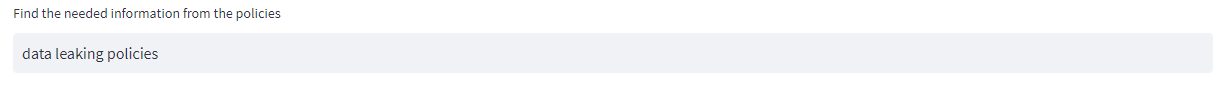


In [10]:
data_token="VIOLATION RULES"

SELECTING RENFORCEMENT TABLE

In [11]:
check=selector_model(data_token)
value_print=""
paragraphs=dict()
for i,file_ in enumerate(check):
    print("*********",i,"*****************" ,end="\n")
    para=""
    for val in file_:
        para=para+val+"\n"
    paragraphs[i+1]=str(para)

********* 0 *****************
********* 1 *****************
********* 2 *****************


PROBABILITY FUNCTION FOR ORDER PREFERENCE

1. Help to get order of the result

2. Result is a list having numbers represents search_techniques1 ,search_techniques_2,search_technique3

3. The best thing about the probality function is that,It gets better at every usage.

for e.g we have a table with score
| serach  | score  |
|---|---|
|Direct search | 1  |
|Symentics search |5|
|token search|3|

According to above table

##### we create a list

[1  2  2  2  2  2  3  3  3]

#####  where 
* 1  :  direct search 
* 2  :  Symentics search
* 3  :  token search

Now 
- random pick a number from 
- [1 2 2 2 2 2 3 3 3] - let say we get 3
- [1 2 2 2 2 2] - return 2
- [ 1 ] return 1

so the order will be

[ 3 2 1]







In [12]:
reform_val=reform_table()
value_pred=[]
for i in reform_val:
    for j in range(reform_val[i]):
        value_pred.append(i)
need=[]
for i in reform_val:
    rand_idx = random.randrange(len(value_pred))
    remove_item=value_pred[rand_idx]
    need.append(value_pred[rand_idx])
    while(remove_item in value_pred):
        value_pred.remove(remove_item)  
need

['3', '2', '1']

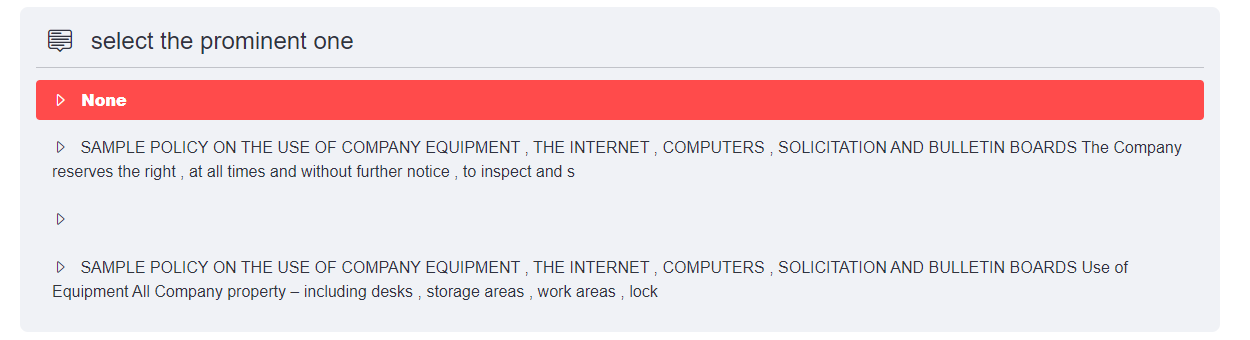

In [13]:
t=1
for i in need:
    print("**********search"+str(t)+"**************")
    print(paragraphs[int(i)][:300],end="\n")
    t+=1
    if len(paragraphs[int(i)][:300])==0:
        print("Model is unable to find results")
    

**********search1**************
The Company reserves the right , at all times and without further notice , to inspect and search all Company property for the purpose of determining whether this policy or any other policy of the Company has been violated , or when an inspection and investigation is necessary for purposes of promoti
**********search2**************
SAMPLE POLICY ON THE USE OF COMPANY EQUIPMENT , THE INTERNET , COMPUTERS , SOLICITATION AND BULLETIN BOARDS 
Use of Equipment All Company property – including desks , storage areas , work areas , lockers , file cabinets , credenzas , computer systems , office telephones , cellular telephones , modem
**********search3**************

Model is unable to find results
